In [7]:
import pandas
print (pandas.__version__)

2.2.2


In [9]:
pip list

Package                           Version
--------------------------------- ------------------
accessible-pygments               0.0.5
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
affine                            2.4.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiolimiter                        1.2.1
aiosignal                         1.2.0
alabaster                         0.7.16
albucore                          0.0.24
albumentations                    2.0.8
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-cat

In [10]:
import pandas as pd 
data = "AnemiaTipos.csv"

dataset = pd.read_csv(data)

dataset

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [13]:
# Librerías para el desarrollo del proyecto
import matplotlib.pyplot as plt  # Librería para gráficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

# Librerías pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

# Enlazando los datos en el archivo CSV
data = pd.read_csv("AnemiaTipos.csv", index_col=None)
import numpy as np
# Invocando a la librería
from lightgbm import LGBMClassifier  # salu2

In [14]:
#Verificamos cuantos tipos de enfermedades hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [17]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [19]:
X.shape

(1150, 14)

In [21]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(1150,)

## CODIFICANDO "Y"

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [26]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [31]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEANDO

In [34]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTEENN(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-ENN:", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-ENN: Counter({2: 259, 5: 229, 4: 198, 0: 195, 1: 184, 3: 109})


## MODELO STACKING LGBM 


In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from lightgbm import LGBMClassifier

# Modelos base con mejores hiperparámetros (sin LGBM porque es el meta-modelo)
modelo_rf = RandomForestClassifier(
    criterion='gini',
    max_depth=6,
    max_features='sqrt',
    max_leaf_nodes=None,
    n_estimators=100,
    random_state=42
)

modelo_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_features=None,
    min_samples_leaf=5,
    splitter='best',
    random_state=42
)

modelo_xgb = XGBClassifier(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

modelo_catboost = CatBoostClassifier(
    depth=5,
    iterations=200,
    l2_leaf_reg=3,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)

modelo_tabnet = TabNetClassifier(
    n_d=24,
    n_a=24,
    n_steps=5,
    gamma=1.3,
    lambda_sparse=1e-5,
    optimizer_params=dict(lr=0.002),
    seed=42,
    verbose=0
)

# Meta-modelo (LGBMClassifier con mejores parámetros)
meta_model = LGBMClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    num_leaves=31,
    random_state=42
)

# Stacking con LGBM como meta-modelo
stacking_model = StackingClassifier(
    estimators=[
        ('rf', modelo_rf),
        ('dt', modelo_dt),
        ('xgb', modelo_xgb),
        ('catboost', modelo_catboost),
        ('tabnet', modelo_tabnet)
    ],
    final_estimator=meta_model,
    cv=10,
    passthrough=False,
    n_jobs=-1
)

# ⚠️ Conversión a numpy (por TabNet)
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_np = y_train_res.values if hasattr(y_train_res, "values") else y_train_res
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_np = y_testset.values if hasattr(y_testset, "values") else y_testset

# Entrenamiento
stacking_model.fit(X_train_np, y_train_np)

# Evaluación
y_pred = stacking_model.predict(X_test_np)
print(classification_report(y_test_np, y_pred, digits=7))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6123
[LightGBM] [Info] Number of data points in the train set: 1174, number of used features: 30
[LightGBM] [Info] Start training from score -1.795172
[LightGBM] [Info] Start training from score -1.853236
[LightGBM] [Info] Start training from score -1.511344
[LightGBM] [Info] Start training from score -2.376824
[LightGBM] [Info] Start training from score -1.779905
[LightGBM] [Info] Start training from score -1.634450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\luisc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\luisc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\luisc\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\luisc\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\luisc\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

In [50]:
y_decodificado = le.inverse_transform(y_codificado)

print(y_codificado)
print(y_decodificado)

[3 3 1 ... 0 0 0]
['Normocytic hypochromic anemia' 'Normocytic hypochromic anemia'
 'Iron deficiency anemia' ... 'Healthy' 'Healthy' 'Healthy']


## MÉTRICAS DEL MODELO (TRAIN)

In [53]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import column_or_1d

# Asegurar que X esté en formato NumPy
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = column_or_1d(y_train_res)

# Obtener predicciones y probabilidades
y_pred = stacking_model.predict(X_train_np)
y_probs = stacking_model.predict_proba(X_train_np)

# Calcular y mostrar métricas
print('=== Métricas del Modelo train ===')
print('Accuracy:', accuracy_score(y_train_vec, y_pred), '→', accuracy_score(y_train_vec, y_pred) * 100, '%')
print('Precisión:', precision_score(y_train_vec, y_pred, average='macro'), '→', precision_score(y_train_vec, y_pred, average='macro') * 100, '%')
print('Sensibilidad (Recall):', recall_score(y_train_vec, y_pred, average='macro'), '→', recall_score(y_train_vec, y_pred, average='macro') * 100, '%')
print('F1-score:', f1_score(y_train_vec, y_pred, average='macro'), '→', f1_score(y_train_vec, y_pred, average='macro') * 100, '%')

# Calcular ROC AUC
if len(stacking_model.classes_) == 2:
    roc_auc = roc_auc_score(y_train_vec, y_probs[:, 1])
else:
    y_bin = LabelBinarizer().fit_transform(y_train_vec)
    roc_auc = roc_auc_score(y_bin, y_probs, multi_class='ovr')

print('ROC AUC:', roc_auc, '→', roc_auc * 100, '%')
print('Matthews Corrcoef:', matthews_corrcoef(y_train_vec, y_pred))


=== Métricas del Modelo train ===
Accuracy: 1.0 → 100.0 %
Precisión: 1.0 → 100.0 %
Sensibilidad (Recall): 1.0 → 100.0 %
F1-score: 1.0 → 100.0 %
ROC AUC: 1.0 → 100.0 %
Matthews Corrcoef: 1.0


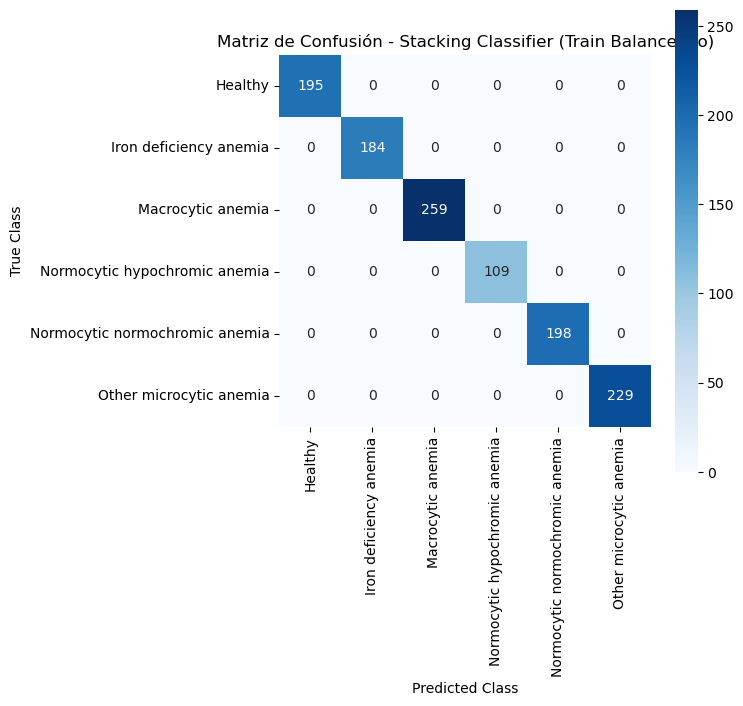

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asegurar que X esté en formato NumPy
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = y_train_res.values.ravel() if hasattr(y_train_res, "values") else np.ravel(y_train_res)

# Predicciones del modelo sobre los datos de entrenamiento balanceados
y_train_pred = stacking_model.predict(X_train_np)

# Decodificar etiquetas verdaderas y predichas
y_true_labels_train = le.inverse_transform(y_train_vec)
y_pred_labels_train = le.inverse_transform(y_train_pred)

# Crear matriz de confusión
conf_matrix_train = pd.crosstab(y_true_labels_train, y_pred_labels_train, rownames=['ACTUAL'], colnames=['Predicción'])

# Gráfico
plt.rcParams["figure.figsize"] = (6, 6)
sns.heatmap(conf_matrix_train, square=True, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Matriz de Confusión - Stacking Classifier (Train Balanceado)')
plt.show()


## MÉTRICAS DEL MODELO (TEST)

In [58]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Asegurar que los datos estén como arrays
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Obtener predicciones y probabilidades
y_pred = stacking_model.predict(X_test_np)
y_probs = stacking_model.predict_proba(X_test_np)

# Calcular y mostrar métricas
print('=== Métricas del Modelo test ===')
print('Accuracy:', accuracy_score(y_test_vec, y_pred), '→', accuracy_score(y_test_vec, y_pred) * 100, '%')
print('Precisión:', precision_score(y_test_vec, y_pred, average='macro'), '→', precision_score(y_test_vec, y_pred, average='macro') * 100, '%')
print('Recall (Sensibilidad):', recall_score(y_test_vec, y_pred, average='macro'), '→', recall_score(y_test_vec, y_pred, average='macro') * 100, '%')
print('F1-score:', f1_score(y_test_vec, y_pred, average='macro'), '→', f1_score(y_test_vec, y_pred, average='macro') * 100, '%')

# Calcular ROC AUC
if len(stacking_model.classes_) == 2:
    roc_auc = roc_auc_score(y_test_vec, y_probs[:, 1])
else:
    y_test_bin = LabelBinarizer().fit_transform(y_test_vec)
    roc_auc = roc_auc_score(y_test_bin, y_probs, multi_class='ovr')

print('ROC AUC:', roc_auc, '→', roc_auc * 100, '%')
print('Matthews Corrcoef:', matthews_corrcoef(y_test_vec, y_pred))


=== Métricas del Modelo test ===
Accuracy: 0.9608695652173913 → 96.08695652173913 %
Precisión: 0.875179211469534 → 87.5179211469534 %
Recall (Sensibilidad): 0.974987666970249 → 97.49876669702489 %
F1-score: 0.9094174118564363 → 90.94174118564364 %
ROC AUC: 0.9925035313040396 → 99.25035313040395 %
Matthews Corrcoef: 0.9500532144278693


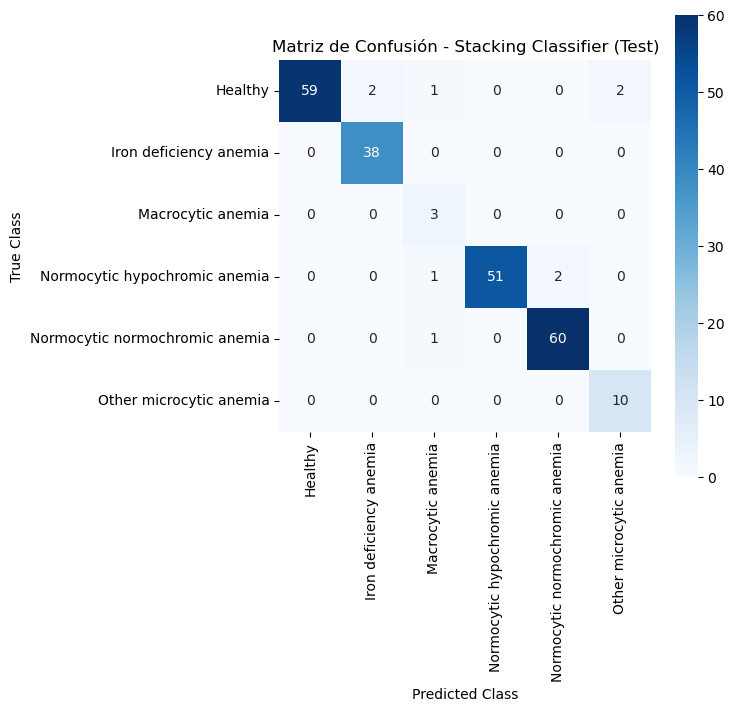

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convertir X_testset y y_testset a formato compatible
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Predicciones codificadas
y_test_pred = stacking_model.predict(X_test_np)

# Decodificar etiquetas
y_true_labels = le.inverse_transform(y_test_vec)
y_pred_labels = le.inverse_transform(y_test_pred)

# Crear matriz de confusión
conf_matrix = pd.crosstab(y_true_labels, y_pred_labels, rownames=['ACTUAL'], colnames=['Predicción'])

# Graficar
plt.rcParams["figure.figsize"] = (6, 6)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Matriz de Confusión - Stacking Classifier (Test)')
plt.show()


## ROC CURVE (TRAIN)

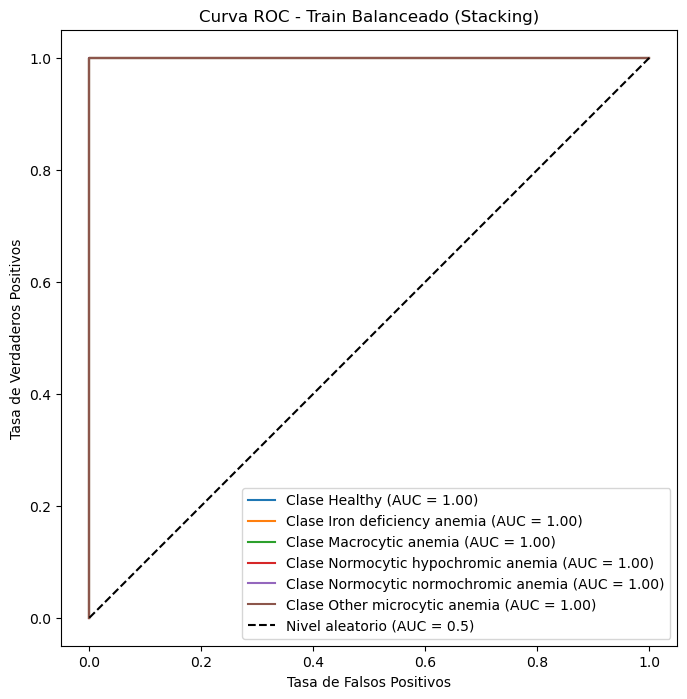

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Convertir a NumPy
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = y_train_res.values.ravel() if hasattr(y_train_res, "values") else np.ravel(y_train_res)

# Obtener probabilidades
probs = stacking_model.predict_proba(X_train_np)

# Binarizar etiquetas reales
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_vec)

# Crear la figura
plt.figure(figsize=(8, 8))

# Graficar una curva ROC para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea base aleatoria
plt.plot([0, 1], [0, 1], "k--", label="Nivel aleatorio (AUC = 0.5)")

# Estilo del gráfico
plt.axis("square")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Train Balanceado (Stacking)")
plt.legend(loc="lower right")
plt.show()


## ROC CURVE (TEST)

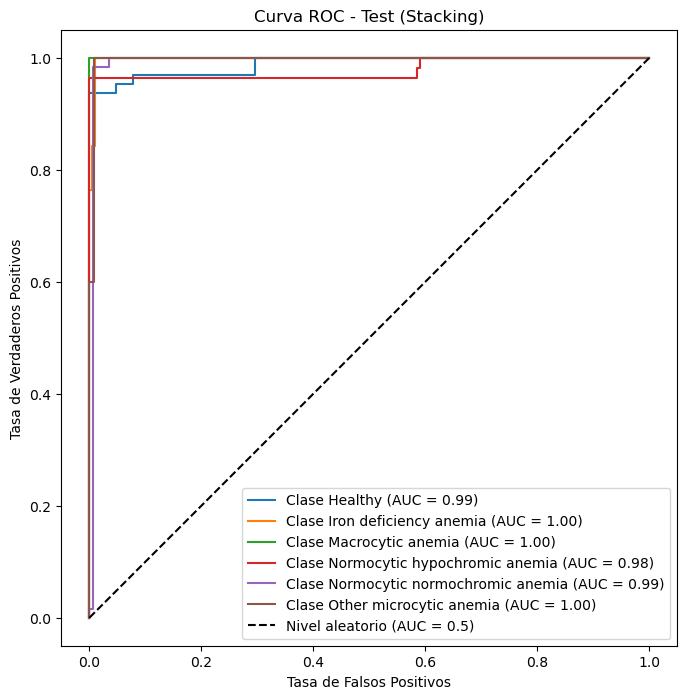

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Convertir a NumPy
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Obtener probabilidades para todas las clases
probs = stacking_model.predict_proba(X_test_np)

# Binarizar etiquetas reales
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_vec)

# Crear figura
plt.figure(figsize=(8, 8))

# Curva ROC por clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea base
plt.plot([0, 1], [0, 1], "k--", label="Nivel aleatorio (AUC = 0.5)")

# Estilo
plt.axis("square")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Test (Stacking)")
plt.legend(loc="lower right")
plt.show()


## PRECISION RECALL CURVE (TRAIN)

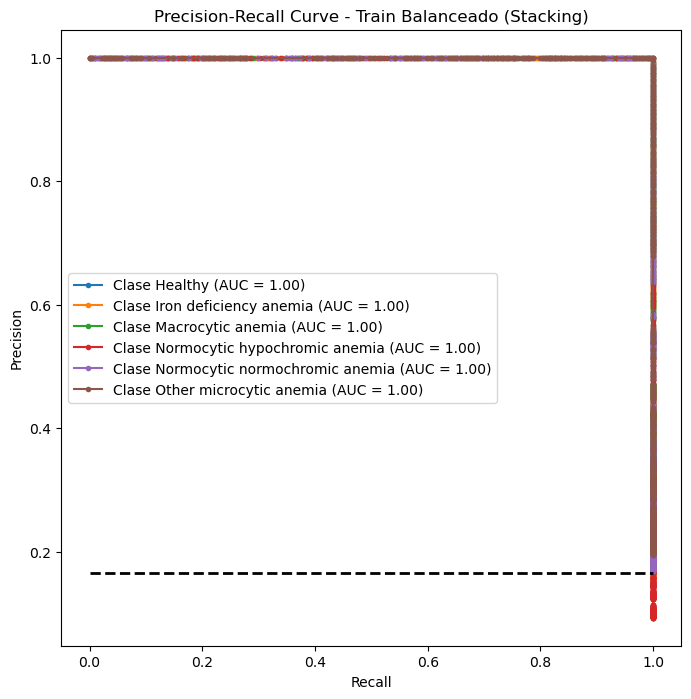

In [69]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Asegurar que los datos estén como arrays
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = y_train_res.values.ravel() if hasattr(y_train_res, "values") else np.ravel(y_train_res)

# Binarizar etiquetas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_vec)

# Obtener probabilidades del modelo
probs = stacking_model.predict_proba(X_train_np)

# Gráfico
plt.figure(figsize=(8, 8))

for i in range(y_train_bin.shape[1]):
    lr_precision, lr_recall, _ = precision_recall_curve(y_train_bin[:, i], probs[:, i])
    pr_auc = auc(lr_recall, lr_precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no skill)
no_skill = np.sum(y_train_bin[:, 0]) / len(y_train_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Balanceado (Stacking)')
plt.legend(loc='best')
plt.show()


## PRECISION RECALL CURVE (TEST)

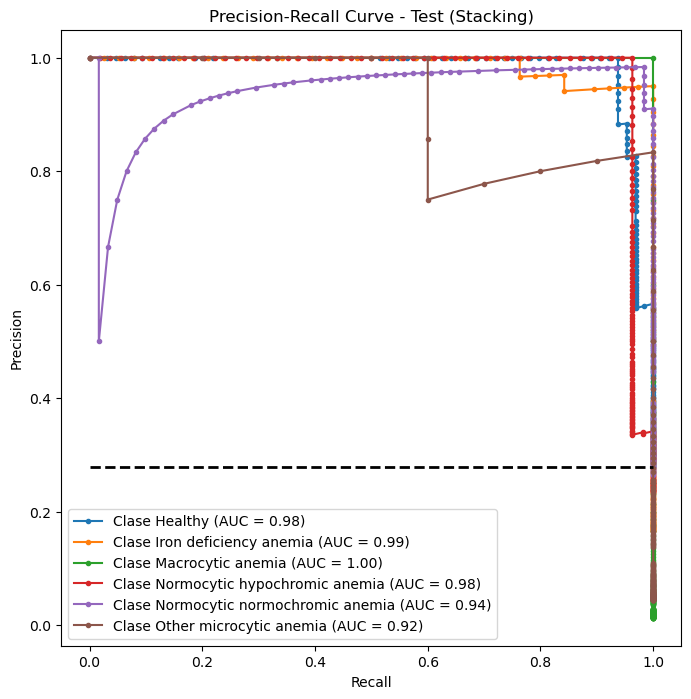

In [72]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convertir a NumPy
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Binarizar etiquetas
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_vec)

# Obtener probabilidades
probs = stacking_model.predict_proba(X_test_np)

# Crear la figura
plt.figure(figsize=(8, 8))

# Curva Precision-Recall por clase
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no-skill)
no_skill = np.sum(y_test_bin[:, 0]) / len(y_test_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

# Estética
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test (Stacking)')
plt.legend(loc='best')
plt.show()


In [90]:
import joblib
import os

# Crear la carpeta Models si no existe
os.makedirs("Models", exist_ok=True)

# Guardar el modelo y el codificador
joblib.dump({'modelo': stacking_model, 'label_encoder': le}, 'Models/LGBM.pkl')


['Models/LGBM.pkl']